# Assignment 2: Voting Visualized

## Deadline

TBD

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and link them in your notebook.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [1]:
%pylab inline
import folium
import json
import pandas as pd
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_folder = './data/'


# Load TopoJson Canton
topo_json_data = json.load(open(r'data/ch-cantons.topojson.json'))

## Task 1: Cartography and census

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.  
  
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

### Task A

In [3]:
# Task A
# Create Swiss map 
def style_national(feature) :
    return {
        'fillColor': '#FF0000', #Offical color red of the Swiss flag
        'weight': 0,
        'opacity': 0,
        'color': '#FF0000',
        'fillOpacity': 0.4
    };

Swiss_map = folium.Map(location=[46.801111, 8.226667], zoom_start = 5.5)

folium.TopoJson(topo_json_data, 'objects.cantons',smooth_factor=0.00001,
                style_function = style_national).add_to(Swiss_map)

Swiss_map.save('Swiss_map_national.html')
Swiss_map


In [4]:
# Create Swiss map with the cantons delimitations
def style_canton(feature) :
    return {
        'fillColor': '#FF0000',
        'weight': 2.5,
        'opacity': 1,
        'color': '#FFFFFF',
        'fillOpacity': 0.4
    };

Swiss_map = folium.Map(location=[46.801111, 8.226667], zoom_start = 8)

folium.TopoJson(topo_json_data, 'objects.cantons',
                smooth_factor=0.00001, style_function = style_canton).add_to(Swiss_map)

Swiss_map.save('Swiss_map_cantons.html')
Swiss_map

#### TASK A :

`Swiss_map_national.html` <a href="Swiss_map_national.html">link</a> show the national border of Switzerland with a view to position it inside Europe. To do that, we create a function that doesn't show the limit of each canton.

`Swiss_map_cantons.html` <a href="Swiss_map_cantons.html">link</a> show the border of the 26 cantons of Switterland. We create a new function that now create the limits.

Note that we take the official red of the Switzerland flag. 

### Task B

In [5]:
# Load the excel file
Swiss_pop = pd.read_excel(data_folder + 'communes_pop.xls', sheet_name = '2017',
                               header = 3, skiprows = [4, 5], skipfooter = 7).reset_index()

# Rename column after the loading
Swiss_pop.rename(columns = {'Etat de la' : 'Etat_janvier', 'Arrivées 1)': 'Arrivees',
                                 'Etat de la.1' : 'Etat_decembre', 'en nombres' : 'Variation_nombre',
                                'en %': 'Variation_%','Décès' : 'Deces', 'Départs' : 'Departs', 'index' : 'Nom'},
                 inplace = True)

# Identification of the communes
index = Swiss_pop.Nom.apply(lambda Name: Name.startswith('......'))
Swiss_pop.loc[index, 'Nom'] = Swiss_pop[index]['Nom'].apply(lambda Name : Name[6:])
Swiss_commune = Swiss_pop.loc[index, :]

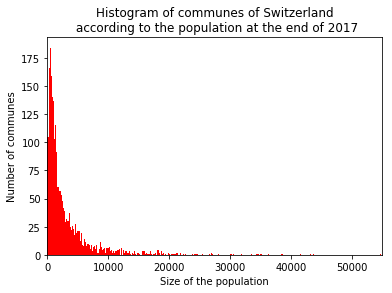

In [6]:
#Task B
plt.hist(Swiss_commune['Etat_decembre'].values,size(Swiss_commune, 0), log = False, normed = False, color = 'r');
xlim(0, 55000);
title('Histogram of communes of Switzerland\n according to the population at the end of 2017');
xlabel('Size of the population');
ylabel('Number of communes');

In [7]:
Swiss_commune = Swiss_commune.sort_values('Etat_decembre')

# 10 Samllest communes
Swiss_commune[['Nom', 'Etat_decembre']].head(10)

,Nom,Etat_decembre
1701,5102 Corippo,12
954,2549 Kammersrohr,29
2191,6172 Bister,32
214,0708 Schelten,34
1357,3707 Lohn (GR),42
218,0715 Rebévelier,42
314,0972 Berken,43
428,0661 Clavaleyres,46
1793,5315 Linescio,48
1791,5309 Cerentino,49


In [8]:
# 10 Highest communes
Swiss_commune[['Nom', 'Etat_decembre']].tail(10)

,Nom,Etat_decembre
225,0371 Biel/Bienne,54640
1741,5192 Lugano,63494
1156,3203 St. Gallen,75522
546,1061 Luzern,81401
165,0230 Winterthur,110912
377,0351 Bern,133798
1962,5586 Lausanne,138905
993,2701 Basel,171513
2321,6621 Genève,200548
181,0261 Zürich,409241


In [9]:
Swiss_commune[['Etat_decembre']].describe()

,Etat_decembre
count,2240.000000
mean,3787.558036
std,12436.473308
min,12.000000
25%,679.000000
50%,1493.500000
75%,3643.500000
max,409241.000000


#### Task B :

[...]

### Task C

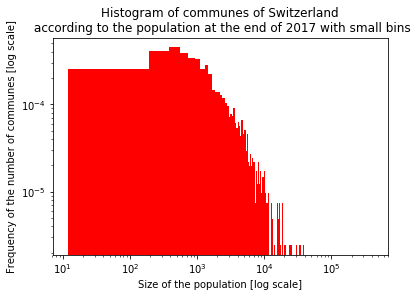

In [10]:
# Task C
plt.hist(Swiss_commune['Etat_decembre'].values,size(Swiss_commune, 0), log = True, normed = True, color = 'r');
plt.xscale('log')

title('Histogram of communes of Switzerland\n according to the population at the end of 2017 with small bins');
xlabel('Size of the population [log scale]');
ylabel('Frequency of the number of communes [log scale]');

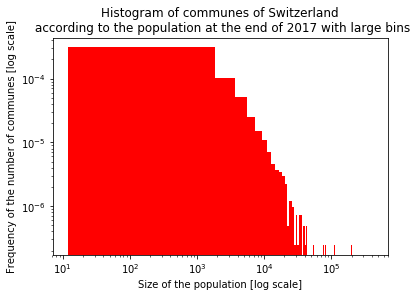

In [11]:
plt.hist(Swiss_commune['Etat_decembre'].values,size(Swiss_commune, 0)//10, log = True, normed = True, color = 'r');
plt.xscale('log')

title('Histogram of communes of Switzerland\n according to the population at the end of 2017 with large bins');
xlabel('Size of the population [log scale]');
ylabel('Frequency of the number of communes [log scale]');

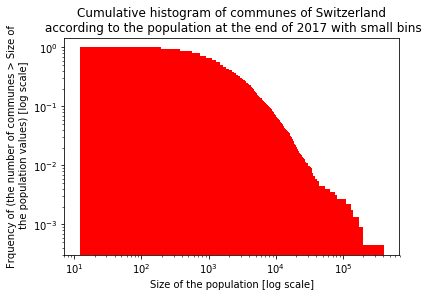

In [12]:
plt.hist(Swiss_commune['Etat_decembre'].values,size(Swiss_commune, 0),
         cumulative=-1, log = True, normed = True, color = 'r');
plt.xscale('log')

title('Cumulative histogram of communes of Switzerland\n according to the population at the end of 2017 with small bins');
xlabel('Size of the population [log scale]');
ylabel('Frquency of (the number of communes > Size of\n the population values) [log scale]');

#### TASK C :

[...]

## Task 2: Parties visualized

We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

For part B, you can use the `data/national_council_elections.xslx` file ([guess where we got it from](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/participation.assetdetail.81625.html)) to have the voting-eligible population of each canton in 2015.

In [13]:
# Translate the french name of the cantons to their id, as it is in the json files
cantons_ids = {
    'Zurich' : 'ZH',
    'Berne' : 'BE',
    'Lucerne' : 'LU',
    'Obwald' : 'OW',
    'Nidwald' : 'NW',
    'Uri' : 'UR',
    'Schwytz' : 'SZ',
    'Schaffhouse' : 'SH',
    'Tessin' : 'TI',
    'Valais' : 'VS',
    'Fribourg' : 'FR',
    'Neuchâtel' : 'NE',
    'Jura' : 'JU',
    'Vaud' : 'VD',
    'Genève' : 'GE',
    'Grisons' : 'GR',
    'Soleure' : 'SO',
    'Bâle-Ville' : 'BS',
    'Bâle-Campagne' : 'BL',
    'St. Gall' : 'SG',
    'Saint-Gall' : 'SG',
    'Glaris' : 'GL',
    'Zoug' : 'ZG',
    'Appenzell Rh. Ext.' : 'AG',
    'Appenzell Rh.-Ext.' : 'AG',
    'Appenzell Rh. Int.' : 'AI',
    'Appenzell Rh.-Int.' : 'AI',
    'Argovie' : 'AR',
    'Thurgovie' : 'TG'
}


def customrename(df):
    '''Remove notes as 3) in column or index names'''
    
    # Rename columns
    idx_col = df.columns.str.contains('\d', regex=True)

    while any(idx_col):
        for col in df.columns[idx_col]:
            df.rename(columns={col : str.strip(col[:-1])}, inplace=True)
        idx_col = df.columns.str.contains('\d', regex=True)
        
    # Rename indexes    
    idx_row = df.index.str.contains('\d', regex=True)

    while any(idx_row):
        for row in df.index[idx_row]:
            df.rename(index={row : str.strip(row[:-1])}, inplace=True)
        idx_row = df.index.str.contains('\d', regex=True)
    
    df.rename(index = lambda x: str.strip(x), inplace=True)
    
    df.rename(index=cantons_ids, inplace=True)
    

### Task A

In [14]:
# Cleaning of the data 

df_voters =  pd.read_excel(data_folder + 'voters.xls',sheet_name = 'actuel (2014-2018)',
                           header=3, usecols='A,C:BL', skiprows=[4,5], skipfooter=(90-35)).reset_index()

# Drop hidden columns and rows of the excel file
df_voters.dropna(axis=0, subset=['index'], inplace=True)
df_voters.dropna(axis=1, how='all', inplace=True)

df_voters.set_index('index', inplace=True)

# Rename columns and indexes using custom function
customrename(df_voters)

df_voters.head()

,Année électorale,Participation,PLR,PDC,PS,UDC,PLS,PEV,PCS,PVL,...,PSA,PES,AVF,Sol.,DS,UDF,Lega,MCR,Autres,Total
index,,,,,,,,,,,,,,,,,,,,,
ZH,2015.0,32.652497,17.327820,4.878712,19.716444,30.023215,NaN,4.271767,NaN,7.637858,...,NaN,7.218776,2.977664,NaN,NaN,2.662277,NaN,NaN,0.669707,100
BE,2018.0,30.516313,11.717910,0.671415,22.328775,26.760869,NaN,6.172897,NaN,6.914731,...,0.681873,10.104467,0.495841,NaN,0.179432,3.710624,NaN,NaN,0.912781,100
LU,2015.0,38.741267,21.039516,30.862513,11.848915,24.115646,NaN,0.199143,NaN,4.320211,...,NaN,6.700011,NaN,NaN,NaN,NaN,NaN,NaN,0.036129,100
UR,2016.0,61.989056,26.856698,31.298814,12.984966,24.053191,NaN,NaN,NaN,NaN,...,NaN,2.378061,NaN,NaN,NaN,NaN,NaN,NaN,2.428270,100
SZ,2016.0,37.747088,21.628996,27.167707,12.925363,33.115090,NaN,0.304428,NaN,2.544623,...,NaN,0.800215,NaN,NaN,NaN,NaN,NaN,NaN,1.513578,100


In [31]:
# Task A

df_udc_voter_per = df_voters[['UDC']]

# We set Nan values to 0 in order to plot them blank, a convention for Nan on maps
df_udc_voter_per.loc['AI', 'UDC'] = 0
df_udc_voter_per.loc['GR', 'UDC'] = 0

df_udc_voter_per.reset_index(inplace=True)

# Map
UDC_map_per = folium.Map(location=[46.801111, 8.226667], zoom_start = 8)


UDC_map_per.choropleth(geo_data=topo_json_data, 
                       data=df_udc_voter_per,
                       columns=['index', 'UDC'],
                       key_on='feature.id',
                       topojson = 'objects.cantons',
                       fill_color='BuGn', fill_opacity=0.7, line_opacity=0.5,
                       threshold_scale = [0, 4, 14, 19, 28, 35], # Custom scale to deal with Nan values
                       legend_name='Percentage of UDC voters (%)')

UDC_map_per.save('UDC_map_per.html')

UDC_map_per

#### Task A :

`UDC_map_per.html` <a href="UDC_map_per.html">link</a>

First, we extract in a new data set only the column UDC. According to the notes in the excel document, AI and GR do not have a value because of
their electoral system which is in conflict with the computation method used the Federal Statistical Office. We can consider two solutions : either 
keep the Nan and indicate missing data on the map, either find other meaningful values. We choose the first option. We consider that a common convention for indicating missing data on a map is to plot it white. Therefore, we set a custom threshold scale for the choropleth function, as there is no coded NaN handling in this function.

### Task B

In [16]:
# Cleaning of the data

df_population =  pd.read_excel(data_folder + 'national_council_elections.xlsx', sheet_name = '2015',
                               header=4, skiprows=[5, 6, 8], skipfooter=(44-34))

# Rename column and index labels
customrename(df_population)

df_population.head()

,Electeurs inscrits,Electeurs,Participation en %
Total,5283556,2563052,48.509981
ZH,907623,428837,47.248362
BE,729203,357770,49.063155
LU,271143,138096,50.931059
UR,26414,15091,57.132581


In [17]:
df_population.describe()

,Electeurs inscrits,Electeurs,Participation en %
count,2.700000e+01,2.700000e+01,27.000000
mean,3.913745e+05,1.898557e+05,49.779808
std,1.000498e+06,4.848625e+05,6.286864
min,1.156500e+04,4.247000e+03,36.722871
25%,5.148600e+04,3.007700e+04,46.543519
50%,1.677200e+05,7.819200e+04,48.509981
75%,2.600290e+05,1.335995e+05,54.004938
max,5.283556e+06,2.563052e+06,62.640097


In [18]:
# Task B

# We do not need the total percentage
df_population_noTotal = df_population.drop('Total')

df_UDC_population = pd.merge(df_population_noTotal, df_udc_voter_per, left_index = True, right_on = 'index')

# Computation of the percentage of voters
df_UDC_population['Voters'] = round(df_UDC_population.Electeurs * df_UDC_population.UDC / 100, 0)

df_UDC_population.set_index('index', inplace=True)
df_UDC_population.loc['AI','Voters'] = 0
df_UDC_population.loc['GR','Voters'] = 0
df_UDC_population.reset_index(inplace=True)


df_UDC_population.drop(columns=['Electeurs inscrits', 'Participation en %', 'Electeurs', 'UDC'], inplace=True)

df_UDC_population.head()

,index,Voters
0,ZH,128751.0
1,BE,95742.0
2,LU,33303.0
3,UR,3630.0
4,SZ,18166.0


In [19]:
df_UDC_population.describe()

,Voters
count,26.000000
mean,22578.769231
std,30684.045708
min,0.000000
25%,4037.500000
50%,10356.000000
75%,24971.250000
max,128751.000000


In [20]:
UDC_pop_map = folium.Map(location=[46.801111, 8.226667], zoom_start = 8)

#thresh = np.linspace(1000,df_UDC_population.Voters.max(),5)
#thresh = np.insert(thresh,0,0)
thresh = [0, 1000, 10000, 40000, 90000, 120000]

UDC_pop_map.choropleth(geo_data=topo_json_data, 
                       data=df_UDC_population,
                       columns=['index', 'Voters'],
                       key_on='feature.id',
                       highlight = True,
                       topojson = 'objects.cantons',
                       fill_color='BuGn', fill_opacity=0.7, line_opacity=0.5,
                       threshold_scale = thresh, # Custom scale to deal with Nan values
                       legend_name='Percentage of UDC residents (%)')

UDC_pop_map.save('UDC_pop_map.html')

UDC_pop_map

#### Task B :

`UDC_pop_map.html` <a href="UDC_pop_map.html">link</a>

[...]

### Task C

For a national election, considering majority voting, the second visualization is more informative, because it will reflect the number of people
ready to vote UDC. It shows how some cantons, as Zurich, have both a big population and a big proportion of UDC voters.

For a cantonal election, the first visalization is more informative as it represents, for each state independently, the proportion of the population ready to vote UDC.

## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

### Task A

In [32]:
# Functions
def compute_right_lean(df):
    '''Compute right lean coefficient'''
    df['RightLean'] = (df.UDC - df.PS)/(df.UDC + df.PS)
    
def right_lean_colors(cantonID,df):
    """Maps Right lean to blue and Left lean to red."""
    right_lean = df.loc[df['index'] == cantonID,'RightLean'].values > 0
    left_lean = df.loc[df['index'] == cantonID,'RightLean'].values < 0
    if right_lean: #UDC
        return '#0000ff'
    elif left_lean: #PS
        return '#ff0000'
    else: #for AI / GR
        return '#ffffff'
    
def right_lean_from_id(cantonID,df):
    """Return right lean value from id."""
    return df.loc[df['index'] == cantonID,'RightLean'].values

def style_right_lean(feature):
    '''Create Swiss map with the cantons delimitations'''
    return {
        'fillColor': right_lean_colors(feature['id'],df_vote_shares_14_18),
        'color' : 'black',
        'weight' : 1.5,
        'dashArray' : '5, 5',
        'fillOpacity': 0.4
        }

In [22]:
df_vote_shares_14_18 = df_voters[['PS', 'UDC']].reset_index()
df_vote_shares_14_18.head()

,index,PS,UDC
0,ZH,19.716444,30.023215
1,BE,22.328775,26.760869
2,LU,11.848915,24.115646
3,UR,12.984966,24.053191
4,SZ,12.925363,33.115090


In [33]:
# Compute right lean coefficient
compute_right_lean(df_vote_shares_14_18)

# Create map
right_lean_map = folium.Map(location=[46.801111, 8.226667], zoom_start = 8)
folium.TopoJson(topo_json_data, 'objects.cantons', style_function=style_right_lean).add_to(right_lean_map)

# Saving the map to facilitate display on Github
right_lean_map.save('right_lean_map.html')

right_lean_map


#### Task A :

`right_lean_map.html` <a href="right_lean_map.html">link</a>

__Approach__ : For each canton, we calculated the right lean using the formula : $$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$
Afterwards, with help of folium TopoJson, we displayed all right-leaning cantons in blue and left-leaning cantons in red. NB : we choosed blue instead of green for right-lean, because the contrast blue-red is easier to identify for daltonian people.

__Analysis__ : We can see the 'rostigraben' quite clearly, with PS being stronger in latin Switzerland (Romandie and Ticino) and UDC being stronger in german-speaking Switzerland. Bilingual cantons are divided (Fribourg leans left, while Valais and Berne lean right). However, 'rostigraben' is not the only criteria here, as some urban german cantons (namely Basel and Solothurn), are predominantly leaning left.

### Task B 

In [24]:
# Pull data from excel file
df_vote_shares_10_13 = pd.read_excel(data_folder + 'voters.xls',
                                     sheet_name = '2010-2013',
                                     header = 3,
                                     skiprows = [4,5,11,17,23,29],
                                     skipfooter = 50,
                                     usecols = [0,8,10]).reset_index()

# Drop hidden columns and rows of the excel file
df_vote_shares_10_13.dropna(axis=0, subset=['index'], inplace=True)
df_vote_shares_10_13.dropna(axis=1, how='all', inplace=True)

df_vote_shares_10_13.set_index('index', inplace=True)

# Rename columns and indexes using custom function
customrename(df_vote_shares_10_13)

df_vote_shares_10_13 = df_vote_shares_10_13[['PS', 'UDC']].reset_index()

# Compute right lean coefficient
compute_right_lean(df_vote_shares_10_13) 

df_vote_shares_10_13.head()


,index,PS,UDC,RightLean
0,ZH,19.317182,29.635552,0.210782
1,BE,18.852832,26.621577,0.170838
2,LU,10.964228,22.126508,0.337323
3,UR,12.085318,24.629866,0.341672
4,SZ,12.381160,34.004523,0.466165


In [25]:
# Merge dataframes and inform cantons IDs
df_vote_shares_10_18 = pd.merge(df_vote_shares_10_13, df_vote_shares_14_18, left_on = 'index', right_on='index')

df_vote_shares_10_18['PS_change'] = df_vote_shares_10_18['PS_y'] - df_vote_shares_10_18['PS_x']
df_vote_shares_10_18['UDC_change'] = df_vote_shares_10_18['UDC_y'] - df_vote_shares_10_18['UDC_x']

# Default value for AI
df_vote_shares_10_18.loc[df_vote_shares_10_18['index'] == 'AI', 'UDC_change'] = -10
df_vote_shares_10_18.loc[df_vote_shares_10_18['index'] == 'AI', 'PS_change'] = -10

# Default value for GR
df_vote_shares_10_18.loc[df_vote_shares_10_18['index'] == 'GR', 'UDC_change'] = -10
df_vote_shares_10_18.loc[df_vote_shares_10_18['index'] == 'GR', 'PS_change'] = -10

df_vote_shares_10_18.head(30)

,index,PS_x,UDC_x,RightLean_x,PS_y,UDC_y,RightLean_y,PS_change,UDC_change
0,ZH,19.317182,29.635552,0.210782,19.716444,30.023215,0.207214,0.399261,0.387663
1,BE,18.852832,26.621577,0.170838,22.328775,26.760869,0.090286,3.475942,0.139293
2,LU,10.964228,22.126508,0.337323,11.848915,24.115646,0.341078,0.884687,1.989138
3,UR,12.085318,24.629866,0.341672,12.984966,24.053191,0.298833,0.899648,-0.576676
4,SZ,12.381160,34.004523,0.466165,12.925363,33.115090,0.438521,0.544203,-0.889433
5,OW,10.921757,21.122156,0.318326,15.090867,24.532303,0.238281,4.169110,3.410147
6,NW,2.090228,26.614033,0.854361,4.470053,25.916631,0.705789,2.379824,-0.697402
7,GL,13.920524,26.328971,0.308288,12.750408,25.275361,0.329381,-1.170117,-1.053610
8,ZG,10.264115,22.725281,0.377732,9.250912,23.631802,0.437339,-1.013202,0.906521
9,FR,24.252459,18.593468,-0.132078,23.584309,19.717606,-0.089296,-0.668150,1.124138


In [26]:
# Mapping PS vote share change
PS_change_map = folium.Map(location=[46.801111, 8.226667], zoom_start = 8)

PS_change_map.choropleth(
    geo_data=topo_json_data, 
    data=df_vote_shares_10_18,
    columns=['index','PS_change'],
    key_on='feature.id',
    topojson = 'objects.cantons',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='PS vote share change in cantonal elections (%)')

PS_change_map.save('PS_change_map.html')
PS_change_map

In [27]:
# Mapping UDC vote share change
UDC_change_map = folium.Map(location=[46.801111, 8.226667], zoom_start = 8)

UDC_change_map.choropleth(
    geo_data=topo_json_data, 
    data=df_vote_shares_10_18,
    columns=['index','UDC_change'],
    key_on='feature.id',
    topojson = 'objects.cantons',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='UDC vote share change in cantonal elections (%)')

UDC_change_map.save('UDC_change_map.html')
UDC_change_map

#### Task B :

`PS_change_map.html` <a href="PS_change_map.html">link</a>
`UDC_change_map.html` <a href="UDC_change_map.html">link</a>

__Approach and visualization choices__ : First, we extracted the FSO data for the 2 periods 2010-2013 and 2014-2018. We cleaned the data, removing unnecessary rows and columns. 2 cantons have no values, so we had to define default values for these cantons to be represented in white on the map (cultural convention to mean "no data"). We decided to represent the data using a chroropleth map because this visualization seemed more appropriate to us to represent a difference between two sets of data. As is often the case in data visualization, the least overloaded visualization is often the best in terms of readability, as long as the quality of the information is preserved, which is the case with chroropleth. However, it should be noted that if it had been necessary to represent changes between three or more periods, a time slider would have been more appropriate. 

### Conclusion

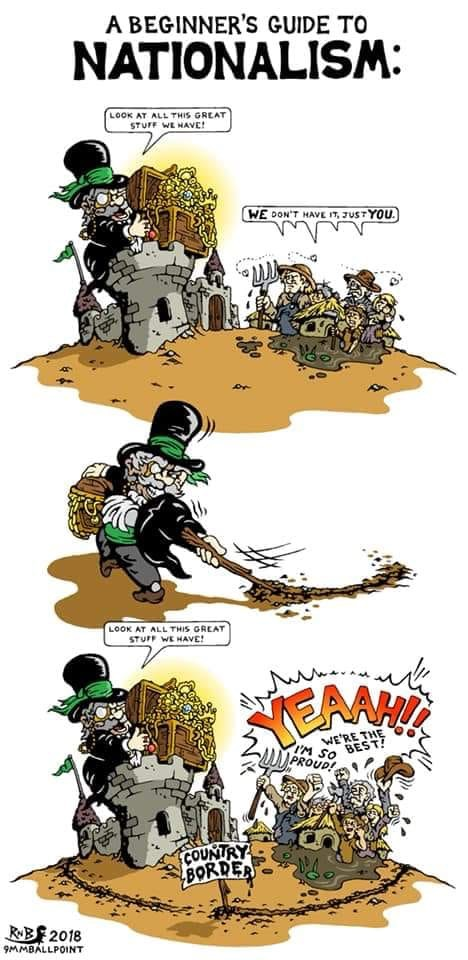

In [28]:
Image(data_folder+'IMG_2885.jpg', width=400)